# Table of Contents
#### 01. Importing
#### 02. Data Cleaning
#### 03. Elbow Technique
#### 04. k-means Clustering

## 01. Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures that the graphs you create are displayed within the notebook

%matplotlib inline

In [3]:
# Path
path =r'/Users/heathervisentin/Desktop/Data Analysis/Achievement 6/World Happiness Report'

In [4]:
# Importing Data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WHR02.pkl'))

## 02. Data Cleaning

In [5]:
df.shape

(2199, 12)

In [6]:
df.columns

Index(['Country', 'year', 'Happiness Score', 'GDP per capita',
       'Social support', 'Life Expectancy', 'Freedom', 'Generosity',
       'Corruption', 'Positive affect', 'Negative affect',
       'Happiness category'],
      dtype='object')

In [7]:
df1 = df[['Happiness Score', 'GDP per capita', 'Social support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']]

In [8]:
# Check for missing values

df1.isnull().sum()

Happiness Score      0
GDP per capita      20
Social support      13
Life Expectancy     54
Freedom             33
Generosity          73
Corruption         116
dtype: int64

In [9]:
df1.shape

(2199, 7)

In [10]:
df1.dropna(subset=['GDP per capita'], inplace=True)

/Users/heathervisentin/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [11]:
df1.dropna(subset=['Generosity'], inplace=True)

In [12]:
df1.dropna(subset=['Life Expectancy'], inplace=True)

In [13]:
df1.dropna(subset=['Freedom'], inplace=True)

In [14]:
df1.dropna(subset=['Corruption'], inplace=True)

In [15]:
df1.dropna(subset=['Social support'], inplace=True)

In [16]:
# Check for missing values

df1.isnull().sum()

Happiness Score    0
GDP per capita     0
Social support     0
Life Expectancy    0
Freedom            0
Generosity         0
Corruption         0
dtype: int64

In [17]:
df1.shape

(1964, 7)

## 03. Elbow Technique

In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [19]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-103195.24343629974,
 -32573.149917028208,
 -19381.902275785447,
 -13222.806422225247,
 -9638.597145418611,
 -7025.1425208934525,
 -5733.2394679240715,
 -4744.253451317905,
 -4149.708599582183]

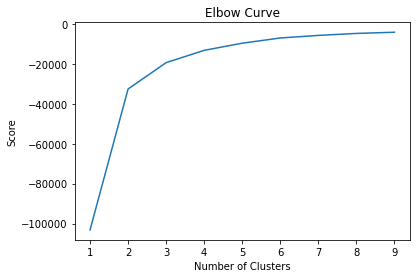

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

the curve starts to flatten more after 4.  The optimal cluster count is 4.

## 04. k-means Clustering

In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [22]:
# Fit the k-means object to the data.

kmeans.fit(df1)

/Users/heathervisentin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [23]:
df1['clusters'] = kmeans.fit_predict(df1)

/Users/heathervisentin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/var/folders/n4/9dld_g3s48gbkkms7ldc6nbm0000gn/T/ipykernel_66844/865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [24]:
df1.head()

,Happiness Score,GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Corruption,clusters
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,1
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,1
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,1
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,1
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,1


In [25]:
df1['clusters'].value_counts()

0    721
2    546
3    419
1    278
Name: clusters, dtype: int64

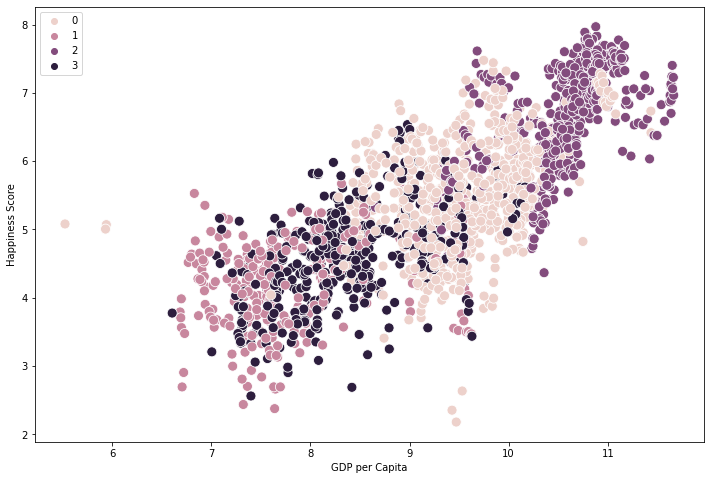

In [26]:
# Plot the clusters for the "Happiness Score" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['GDP per capita'], y=df1['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

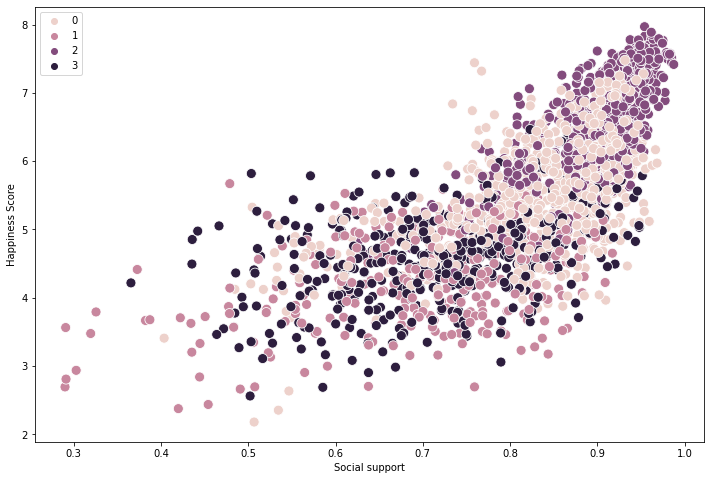

In [27]:
# Plot the clusters for the "Happiness Score" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Social support'], y=df1['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social support') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

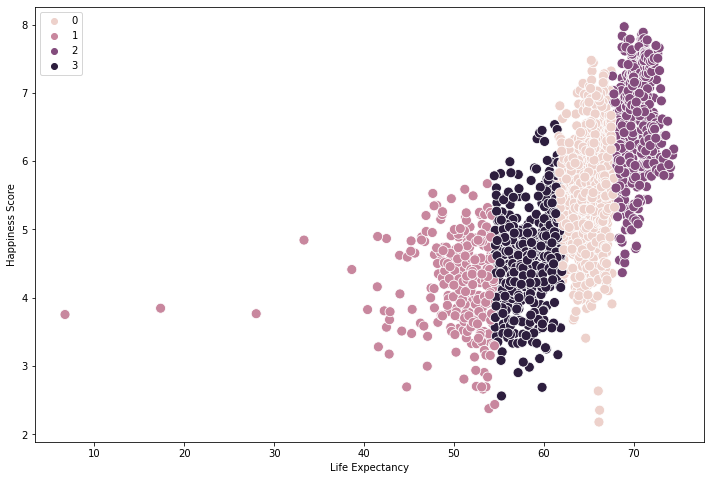

In [28]:
# Plot the clusters for the "Happiness Score" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Life Expectancy'], y=df1['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life Expectancy') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

This cluster seems very clear, the purple group is low life expectancy and low happiness,<br>
the light pink is slightly higher for both, pink is higher again with a few low happiness<br>
outliers and dark purple is highest for both life expectancy and happiness.

In [29]:
df1.loc[df1['clusters'] == 3, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 2, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'pink'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'light pink'

/Users/heathervisentin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/heathervisentin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [30]:
df1.groupby('cluster').agg({'Social support':['mean', 'median'], 
                         'Life Expectancy':['mean', 'median'], 
                         'GDP per capita':['mean', 'median'],
                          'Happiness Score':['mean', 'median']})

Social support           Life Expectancy             \
                      mean    median            mean     median   
cluster                                                           
dark purple       0.722280  0.733540       58.387953  58.500000   
light pink        0.830018  0.851195       65.236418  65.400002   
pink              0.697399  0.723701       50.511817  51.572500   
purple            0.901079  0.918428       70.497839  70.612499   

            GDP per capita            Happiness Score            
                      mean     median            mean    median  
cluster                                                          
dark purple       8.385159   8.328985        4.601945  4.608616  
light pink        9.557362   9.569242        5.532122  5.552915  
pink              7.812331   7.631773        4.205272  4.238049  
purple           10.571196  10.641562        6.652132  6.760653

The dark purple cluster has the highest results for all categories.<br>
pink is the next with all 4 groups having the next highest values.  This is followed<br>
by the light pink group and lastly the purple group.<br>

There doesnt 

In [31]:
df1.head()

,Happiness Score,GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Corruption,clusters,cluster
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,1,pink
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,1,pink
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,1,pink
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,1,pink
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,1,pink


In [32]:
#export data
df.to_excel(os.path.join(path, '02 Data','Prepared Data', 'WHR-clustering.xlsx'))